In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import secondary_utils as su
import frc_utils as frc_util
import imageio
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
import h5py

In [2]:
path = "/Users/ecem/Desktop/mres/image_roc/siFRC/"

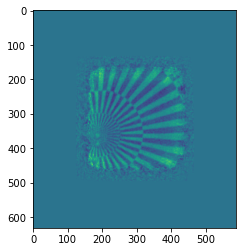

In [3]:
even = h5py.File(path + "ecem_even_rec_u2_s1_a5_st7_0_0_20231204-125406.hdf")
even_phase = even['entry_1']['process_1']['output_1']['object_phase']
even_phase = np.reshape(even_phase, (632, 588))
plt.imshow(even_phase)

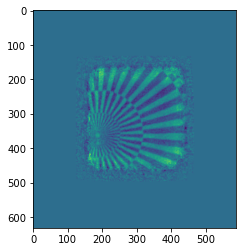

In [4]:
odd = h5py.File(path + "ecem_odd_rec_u2_s1_a5_st7_0_0_20231204-131034.hdf")
odd_phase = odd['entry_1']['process_1']['output_1']['object_phase']
odd_phase = np.reshape(odd_phase, (632, 588))
plt.imshow(odd_phase)

In [5]:
def crop(img, sx, sy, dim_x , dim_y):    
    crop = img[sy-dim_y:sy + dim_y, sx-dim_x:sx + dim_x]
    plt.imshow(crop)
    return crop

In [6]:
588/2

294.0

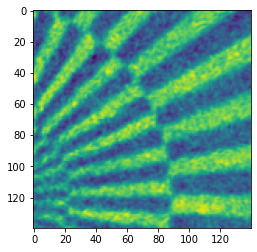

In [10]:
cropped_odd = crop(odd_phase, 300, 310, 70, 70)

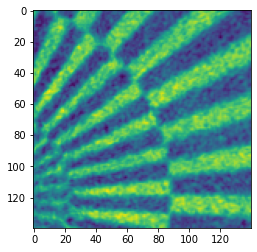

In [11]:
cropped_even = crop(even_phase, 300, 310, 70, 70)

Fourier ring correlation provides an easy-to-use, laboratory consistent standard for measuring the resolution of SRM images.

FRC is a method commonly used for determining the resolution of electron microscopic (EM) recon- structions (Saxton and Baumeister, 1982). FRC evaluates the similarity of two independent reconstructions of the same object in frequency space to determine the resolution threshold (the spatial frequency) at which both reconstructions are consistent. Up to this spatial frequency the object is considered to be resolved.

Fourier Ring Correlation (FRC) has become a popular and relatively unbiased method of estimating image quality/resolution recently, especially in localization-based superresolution microscopy. The main idea is to take two independent images of the same object, calculate their Fourier Tranforms and calculate the correlation of “rings” of increasing frequency in the two spectra. The rings should be correlated for low frequencies until one reaches the resolution limit of the microscope.

Fourier ring correlation measures the degree of correlation of the two images at different spatial frequencies (Saxton and Baumeister, 1982). In order to calculate the Fourier ring correlation, the coordinates resulting from localization based super-resolution experiment are randomly split into two independent datasets (see workflow in Fig. 1). Each dataset is then binned with a definite pixel size into a super-resolution image. The super-resolution image pixel size determines the maximum frequency that can be resolved in the image according to the Nyquist criterion (see Supplementary Information and manual for examples). To calculate the correlation, the images are then Fourier transformed and multiplied. The normalized average correlation is computed for Nr concentric rings of increasing radius (corresponding to increasing spatial frequencies) centered around the (0,0) spatial frequency. The number of rings determines the binning of the FRC curve.

1. The number of rings (Nr), the input data and the super-resolu- tion image pixel size are required as input.
2. The input data are shifted in order to start from pixel position (0,0).
3. Two super-resolution images (of user defined pixel size and dimension set to include all the coordinates) are generated from the input positions by assigning each event randomly to one of the two images. The two images are Fourier transformed and the correlation image is computed as c 1⁄4 eI 1  eI 2 . The FRC and the 2r curves are then computed for Nr rings according to (Saxton and Baumeister, 1982).

performed by index method
performed by index method
performed by index method


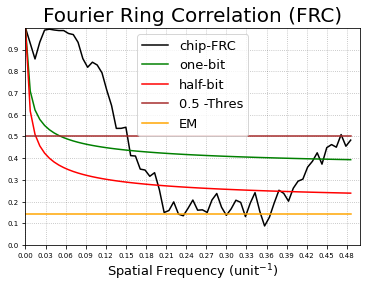

In [12]:
xc, corr_avg, xt, thres_val = frc_util.FRC(cropped_odd, cropped_even, 
                                           thresholding='all',
                                           inscribed_rings=True, 
                                           analytical_arc_based=True)


plt.plot(xc[:-1]/2, corr_avg[:-1], label = 'chip-FRC', color='black')
plt.plot(xt[:-1]/2, (thres_val[0])[:-1], label='one-bit', color='green')
plt.plot(xt[:-1]/2, (thres_val[1])[:-1], label='half-bit', color='red')
plt.plot(xt[:-1]/2, (thres_val[2])[:-1], label='0.5 -Thres', color='brown')
plt.plot(xt[:-1]/2, (thres_val[3])[:-1], label='EM', color='Orange')


plt.xlim(0.0, 0.5)
plt.ylim(0.0, 1)
plt.grid(linestyle='dotted', color='black', alpha=0.3) 
plt.xticks(np.arange(0.0, 0.5, step=0.03))
plt.yticks(np.arange(0, 1, step=0.1))
plt.legend(prop={'size':13})
plt.xlabel('Spatial Frequency (unit$^{-1}$)', {'size':13})
plt.title ('Fourier Ring Correlation (FRC)', {'size':20})
plt.tick_params(axis='both', labelsize=7)